In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")

print("Movies Dataset")
print(movies.head())

print("Ratings Dataset")
print(ratings.head())

Movies Dataset
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
Ratings Dataset
   userId  movieId  rating     timestamp
0       1      2.0     3.5  1.112486e+09
1       1     29.0     3.5  1.112485e+09
2       1     32.0     3.5  1.112485e+09
3       1     47.0     3.5  1.112485e+09
4       1     50.0     3.5  1.112485e+09


In [8]:
print("Movies Shape:", movies.shape)
print("Ratings Shape:", ratings.shape)

print(movies.info())
print(ratings.info())

Movies Shape: (27278, 3)
Ratings Shape: (18293253, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18293253 entries, 0 to 18293252
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    float64
 2   rating     float64
 3   timestamp  float64
dtypes: float64(3), int64(1)
memory usage: 558.3 MB
None


In [9]:
print(movies.isnull().sum())
print(ratings.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      1
rating       1
timestamp    1
dtype: int64


In [10]:
movies = movies.drop_duplicates()
ratings = ratings.drop_duplicates()

In [11]:
movie_data = pd.merge(ratings, movies, on="movieId")

print(movie_data.head())

   userId  movieId  rating     timestamp  \
0       1      2.0     3.5  1.112486e+09   
1       1     29.0     3.5  1.112485e+09   
2       1     32.0     3.5  1.112485e+09   
3       1     47.0     3.5  1.112485e+09   
4       1     50.0     3.5  1.112485e+09   

                                               title  \
0                                     Jumanji (1995)   
1  City of Lost Children, The (Cité des enfants p...   
2          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
3                        Seven (a.k.a. Se7en) (1995)   
4                         Usual Suspects, The (1995)   

                                   genres  
0              Adventure|Children|Fantasy  
1  Adventure|Drama|Fantasy|Mystery|Sci-Fi  
2                 Mystery|Sci-Fi|Thriller  
3                        Mystery|Thriller  
4                  Crime|Mystery|Thriller  


In [12]:
avg_movie_rating = movie_data.groupby("title")["rating"].mean()

top_movies = avg_movie_rating.sort_values(ascending=False).head(10)

print("Top Rated Movies")
print(top_movies)

Top Rated Movies
title
B-Side (2013)                                            5.0
Love and Pigeons (1985)                                  5.0
Paying the Price: Killing the Children of Iraq (2000)    5.0
Peace, Propaganda & the Promised Land (2004)             5.0
Parasites, Les (1999)                                    5.0
Nicht alle waren Mörder (2006)                           5.0
Loser Takes All! (Qui perd gagne !) (2003)               5.0
A Blank on the Map (1971)                                5.0
Iran Is Not the Problem (2008)                           5.0
Palestine Is Still the Issue (2003)                      5.0
Name: rating, dtype: float64


In [13]:
review_count = movie_data.groupby("title")["rating"].count()

most_reviewed_movies = review_count.sort_values(ascending=False).head(10)

print("Most Reviewed Movies")
print(most_reviewed_movies)

Most Reviewed Movies
title
Pulp Fiction (1994)                          61574
Forrest Gump (1994)                          60523
Shawshank Redemption, The (1994)             57959
Silence of the Lambs, The (1991)             57910
Jurassic Park (1993)                         54587
Star Wars: Episode IV - A New Hope (1977)    49803
Braveheart (1995)                            49142
Terminator 2: Judgment Day (1991)            47755
Matrix, The (1999)                           46932
Schindler's List (1993)                      45785
Name: rating, dtype: int64


In [14]:
movie_stats = movie_data.groupby("title").agg(
    average_rating=("rating","mean"),
    total_reviews=("rating","count")
)

print(movie_stats.head())

                                                    average_rating  \
title                                                                
"Great Performances" Cats (1998)                          2.777778   
#chicagoGirl: The Social Network Takes on a Dic...        3.666667   
$ (Dollars) (1971)                                        2.638889   
$5 a Day (2008)                                           2.900000   
$9.99 (2008)                                              3.010417   

                                                    total_reviews  
title                                                              
"Great Performances" Cats (1998)                              144  
#chicagoGirl: The Social Network Takes on a Dic...              3  
$ (Dollars) (1971)                                             18  
$5 a Day (2008)                                                35  
$9.99 (2008)                                                   48  


In [15]:
movies["genres"] = movies["genres"].str.split("|")

movies_genre = movies.explode("genres")

genre_data = pd.merge(ratings, movies_genre, on="movieId")

genre_avg_rating = genre_data.groupby("genres")["rating"].mean().sort_values(ascending=False)

print("Average Rating by Genre")
print(genre_avg_rating)

Average Rating by Genre
genres
Film-Noir             3.964937
War                   3.809641
Documentary           3.741078
Crime                 3.674667
Drama                 3.674484
Mystery               3.663088
IMAX                  3.655757
Animation             3.617183
Western               3.569736
Musical               3.558709
Romance               3.542204
Thriller              3.506626
Fantasy               3.505393
Adventure             3.501535
Action                3.443510
Sci-Fi                3.436188
Comedy                3.426219
Children              3.408227
Horror                3.276093
(no genres listed)    3.066434
Name: rating, dtype: float64


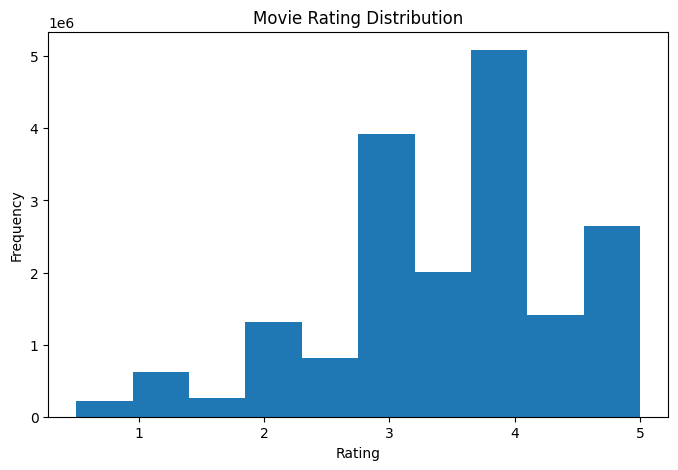

In [16]:
plt.figure(figsize=(8,5))

plt.hist(movie_data["rating"], bins=10)

plt.title("Movie Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")

plt.show()

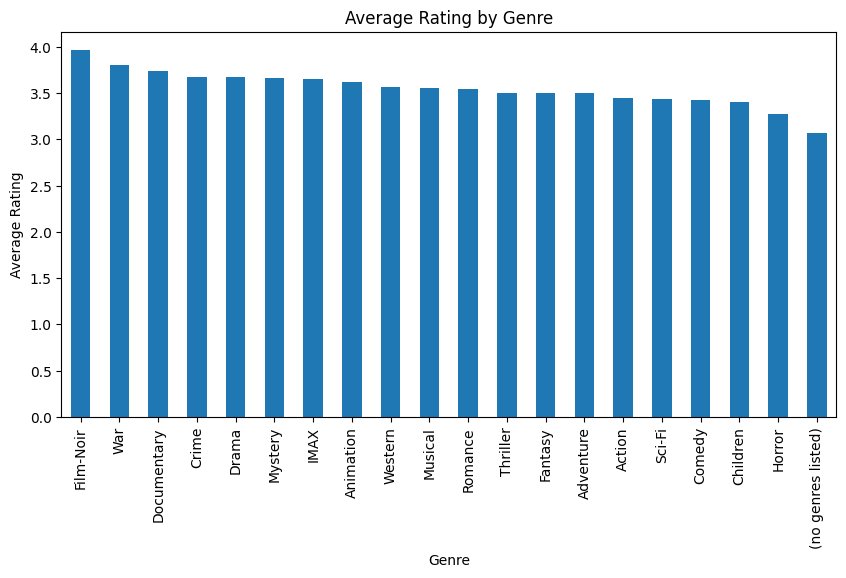

In [17]:
genre_avg_rating.plot(kind="bar", figsize=(10,5))

plt.title("Average Rating by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")

plt.show()